In [1]:
pip install arabic-reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 9.1 MB/s eta 0:00:00


In [2]:
import arabic_reshaper
from bidi.algorithm import get_display


# Function to properly display Arabic text
def fix_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

In [3]:
import pandas as pd

# تحميل البيانات من ملف CSV مع تحديد الفاصل
df = pd.read_csv("Absenteeism_at_work.csv", sep=';')

# عرض معلومات عامة
df.info()

# عرض أول خمس صفوف
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


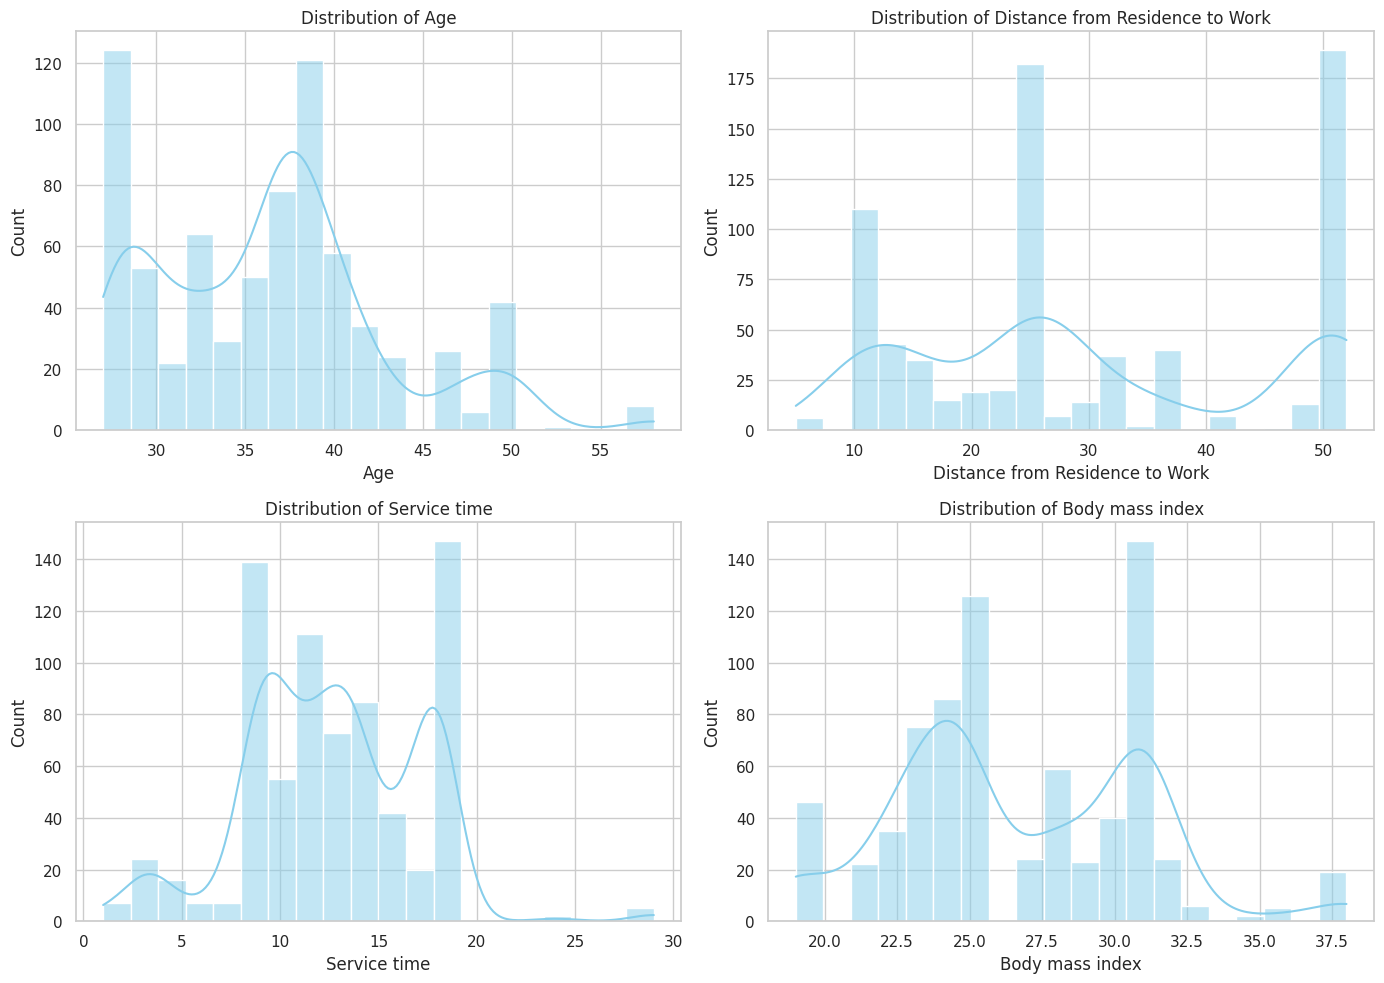

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# إعداد نمط الرسوم
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# عرض توزيع بعض المتغيرات الأساسية
columns_to_plot = ["Age", "Distance from Residence to Work", "Service time", "Body mass index"]
for i, col in enumerate(columns_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler

# حذف الأعمدة غير الضرورية (مثل المعرف وسبب الغياب)
df_clean = df.drop(columns=["ID", "Reason for absence"])

# تحديد المتغيرات المستقلة فقط (باستثناء الهدف التفسيري)
features = df_clean.drop(columns=["Absenteeism time in hours"]).columns.tolist()

# تطبيق المعيار القياسي
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean[features]), columns=features)

# إلحاق عمود الغياب التفسيري (للتفسير لاحقًا بعد التجميع)
df_scaled["Absenteeism time in hours"] = df_clean["Absenteeism time in hours"]

# عرض أول خمس صفوف من البيانات بعد المعالجة
df_scaled.head()


,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.19285,0.851673,-0.019046,0.775932,4
1,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,0.638686,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.56624,1.473056,0.975828,1.009438,0
2,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.56624,0.774000,-0.350671,1.009438,2
3,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.56624,-0.857131,-0.682295,-0.625100,4
4,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.19285,0.851673,-0.019046,0.775932,2


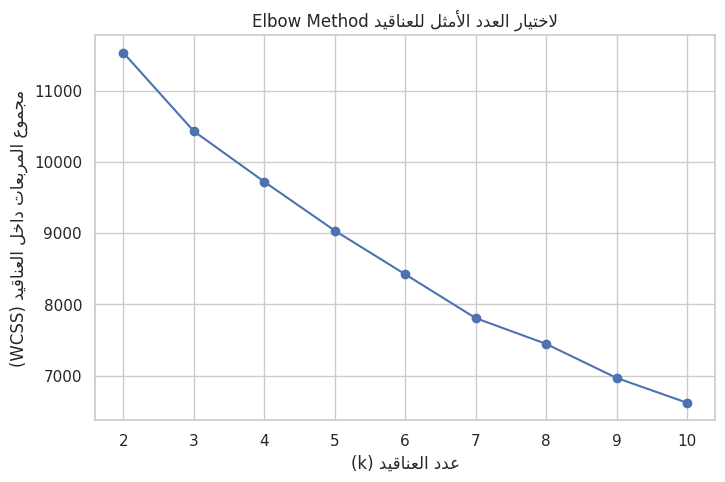

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# إزالة العمود التفسيري لأن التجميع لا يعتمد على متغير تابع
X_features = df_scaled.drop(columns=["Absenteeism time in hours"])

# قائمة لتخزين مجموع مربعات الخطأ داخل العناقيد (WCSS) لكل قيمة k
wcss = []
k_range = range(2, 11)  # تجربة قيم k من 2 إلى 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_features)
    wcss.append(kmeans.inertia_)  # inertia_ تمثل WCSS في scikit-learn

# رسم منحنى Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.title(fix_arabic_text("Elbow Method لاختيار العدد الأمثل للعناقيد"))
plt.xlabel(fix_arabic_text("عدد العناقيد (k)"))
plt.ylabel(fix_arabic_text("مجموع المربعات داخل العناقيد (WCSS)"))
plt.grid(True)
plt.show()


In [7]:
from sklearn.cluster import KMeans
import pandas as pd

# الخطوة 1: إزالة المتغير التفسيري (لأن KMeans لا يستخدم متغير تابع)
X_features = df_scaled.drop(columns=["Absenteeism time in hours"])

# الخطوة 2: تطبيق KMeans بعدد عناقيد محدد (k=4)
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_features)

# الخطوة 3: إلحاق النتائج إلى البيانات
df_scaled["Cluster"] = clusters

# الخطوة 4: عرض عدد السجلات في كل عنقود
cluster_counts = df_scaled["Cluster"].value_counts().sort_index()
print("عدد السجلات في كل عنقود:\n", cluster_counts)

# الخطوة 5: إحصاءات الغياب حسب كل عنقود
cluster_summary = df_scaled.groupby("Cluster")["Absenteeism time in hours"].describe()
print("\nإحصاءات الغياب لكل عنقود:\n", cluster_summary)


عدد السجلات في كل عنقود:
 Cluster
0    138
1    175
2    212
3    215
Name: count, dtype: int64

إحصاءات الغياب لكل عنقود:
          count      mean        std  min  25%  50%  75%    max
Cluster                                                       
0        138.0  5.297101  10.176120  0.0  2.0  3.0  8.0  112.0
1        175.0  5.308571  11.556293  0.0  1.5  3.0  8.0  120.0
2        212.0  8.962264  16.148261  0.0  2.0  4.0  8.0  120.0
3        215.0  7.274419  13.176872  0.0  2.0  3.0  8.0  120.0


In [8]:
# الخطوة 1: استبعاد العمود التفسيري من البيانات الأصلية
original_features = df_clean.drop(columns=["Absenteeism time in hours"])

# الخطوة 2: إنشاء قائمة لتخزين المتوسطات الأصلية لكل عنقود
original_means_by_cluster = []

# الخطوة 3: حساب متوسط كل متغير داخل كل عنقود باستخدام الفهارس الأصلية
for cluster_id in sorted(df_scaled["Cluster"].unique()):
    indices = df_scaled[df_scaled["Cluster"] == cluster_id].index
    cluster_original_mean = original_features.loc[indices].mean()
    original_means_by_cluster.append(cluster_original_mean)

# الخطوة 4: تحويل النتائج إلى DataFrame منظّم
cluster_profiles = pd.DataFrame(original_means_by_cluster)
cluster_profiles.index.name = "Cluster"

# الخطوة 5: عرض الإطار الناتج
print("السمات المميزة لكل عنقود:\n")
print(cluster_profiles)


السمات المميزة لكل عنقود:

         Month of absence  Day of the week   Seasons  Transportation expense  \
Cluster                                                                        
0                6.471014         3.840580  2.688406              253.420290   
1                6.080000         3.902857  2.537143              176.268571   
2                6.905660         4.132075  2.528302              276.188679   
3                5.855814         3.758140  2.474419              183.316279   

         Distance from Residence to Work  Service time        Age  \
Cluster                                                             
0                              34.152174      7.956522  29.811594   
1                              39.571429     17.794286  41.291429   
2                              31.952830     13.009434  38.900943   
3                              16.348837     10.790698  34.353488   

         Work load Average/day   Hit target  Disciplinary failure  Education 

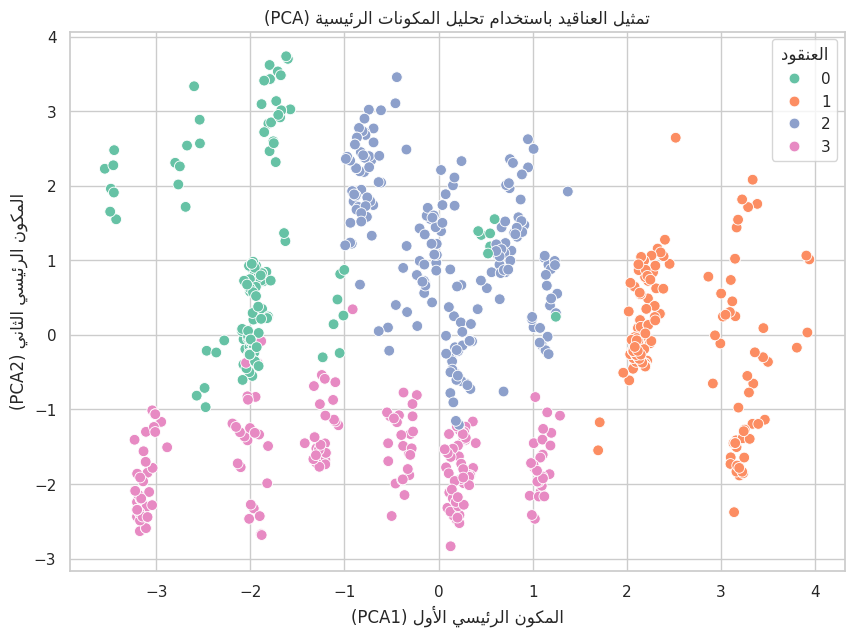

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# إسقاط البيانات إلى بُعدين فقط باستخدام PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(X_features)

# إنشاء إطار بيانات يحتوي على نتائج الإسقاط والعنقود
pca_df = pd.DataFrame(data=pca_result, columns=["PCA1", "PCA2"])
pca_df["Cluster"] = df_scaled["Cluster"]

# رسم العناقيد باستخدام PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=60)
plt.title(fix_arabic_text("تمثيل العناقيد باستخدام تحليل المكونات الرئيسية (PCA)"))
plt.xlabel(fix_arabic_text("المكون الرئيسي الأول (PCA1)"))
plt.ylabel(fix_arabic_text("المكون الرئيسي الثاني (PCA2)"))
plt.legend(title=fix_arabic_text("العنقود"))
plt.grid(True)
plt.show()


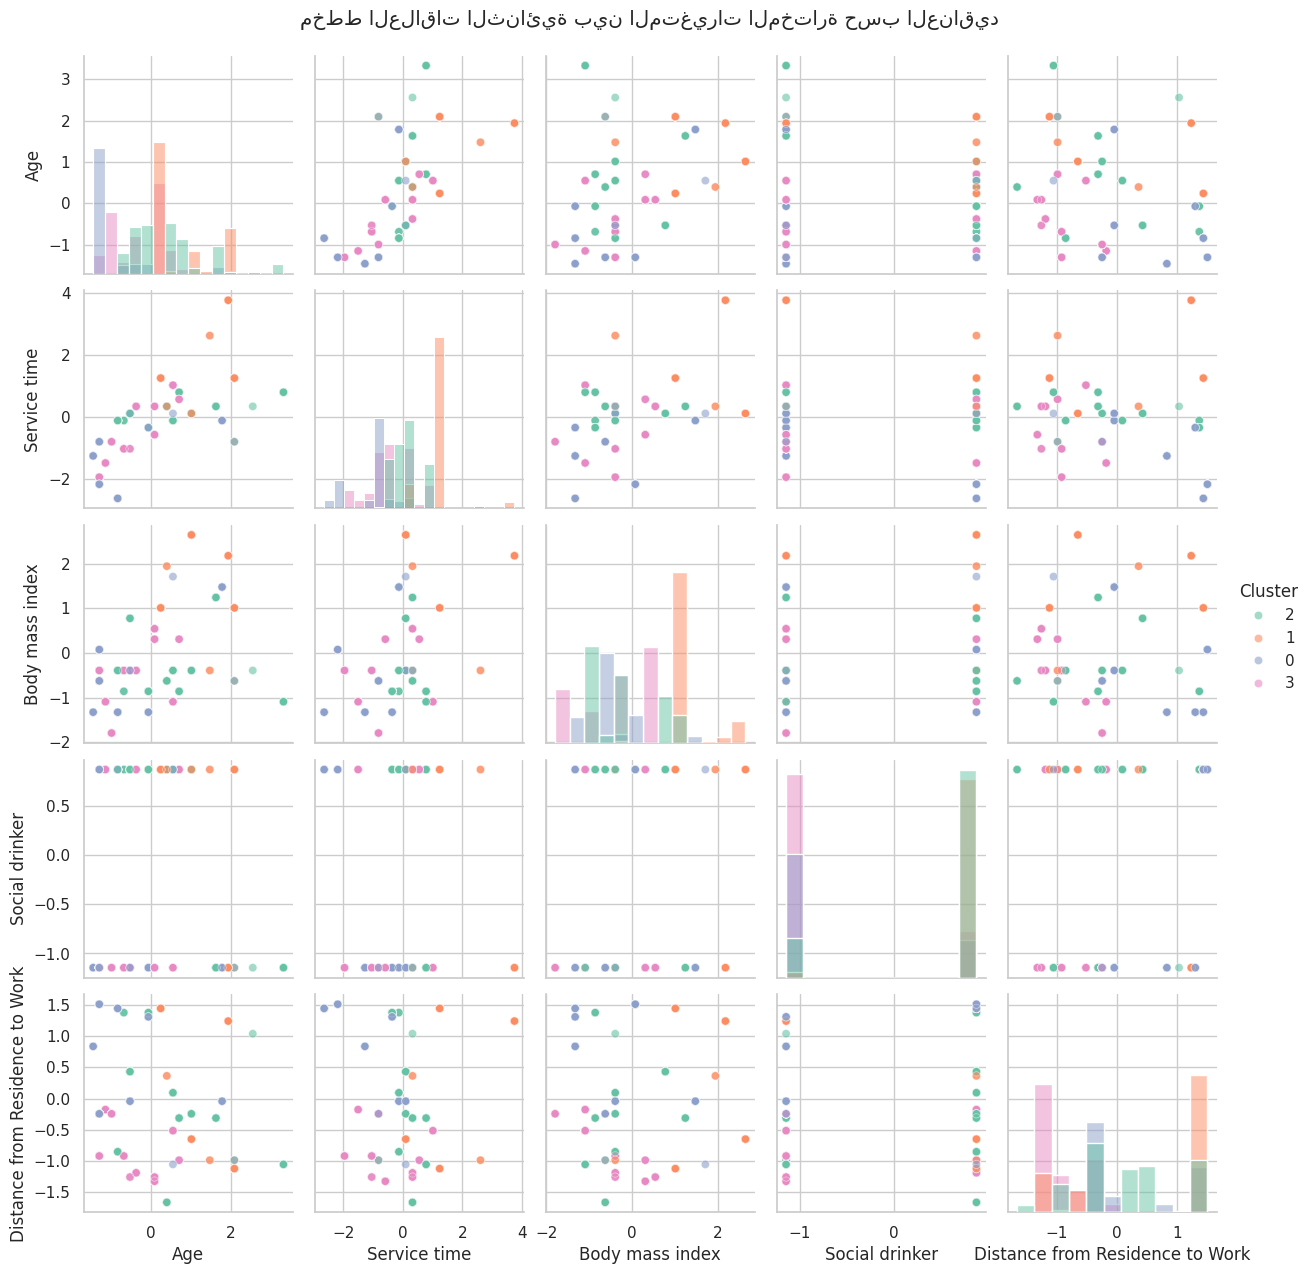

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# اختيار المتغيرات المفتاحية مع العنقود
selected_vars = [
    "Age",
    "Service time",
    "Body mass index",
    "Social drinker",
    "Distance from Residence to Work",
    "Cluster"
]

# إنشاء نسخة مصغرة من البيانات
pairplot_data = df_scaled[selected_vars].copy()

# تحويل رقم العنقود إلى نص لتسهيل التلوين في الرسم
pairplot_data["Cluster"] = pairplot_data["Cluster"].astype(str)

# التأكد من تحويل جميع الأعمدة إلى float (عددي)
for col in pairplot_data.columns:
    if col != "Cluster":
        pairplot_data[col] = pd.to_numeric(pairplot_data[col], errors='coerce')

# حذف الصفوف التي تحتوي على قيم مفقودة بعد التحويل
pairplot_data.dropna(inplace=True)

# رسم المخطط باستخدام hist بدلاً من kde في المحور القطري
sns.pairplot(
    pairplot_data,
    hue="Cluster",
    palette="Set2",
    diag_kind="hist",
    plot_kws={"alpha": 0.6}
)

plt.suptitle("مخطط العلاقات الثنائية بين المتغيرات المختارة حسب العناقيد", y=1.02)
plt.show()


Hier

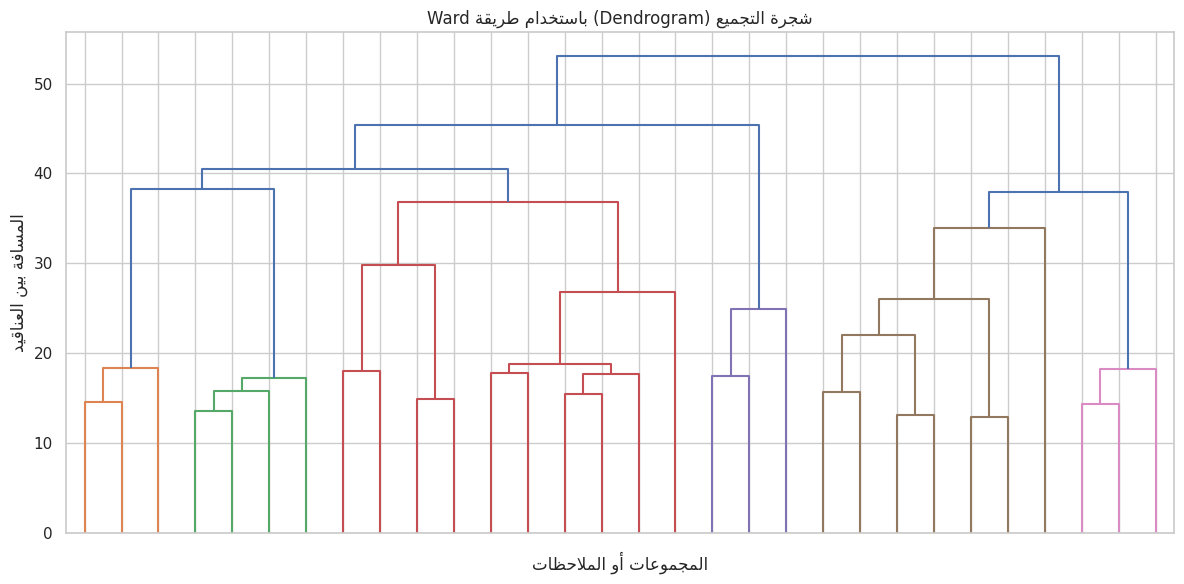

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# حساب مصفوفة الارتباط بين النقاط باستخدام خوارزمية Ward
linked = linkage(X_features, method='ward')

# رسم Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    orientation='top',             # عرض رأسي للتفرعات
    distance_sort='descending',    # ترتيب المسافات من الأكبر للأصغر
    show_leaf_counts=False,        # عدم إظهار عدد الأوراق
    truncate_mode='lastp',         # عرض آخر مجموعات فقط (لتبسيط الشكل)
    p=30                           # عدد العناقيد المعروضة في الرسم
)
plt.title(fix_arabic_text("شجرة التجميع (Dendrogram) باستخدام طريقة Ward"))
plt.xlabel(fix_arabic_text("المجموعات أو الملاحظات"))
plt.ylabel(fix_arabic_text("المسافة بين العناقيد"))
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.cluster import AgglomerativeClustering

# تطبيق نموذج Agglomerative Clustering باستخدام خوارزمية Ward وعدد عناقيد = 4
agglo_model = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglo_labels = agglo_model.fit_predict(X_features)

# إضافة نتائج العناقيد إلى إطار البيانات
df_scaled["Agglo_Cluster"] = agglo_labels

# حساب عدد السجلات في كل عنقود
agglo_counts = df_scaled["Agglo_Cluster"].value_counts().sort_index()
print("عدد السجلات في كل عنقود:")
print(agglo_counts)

# حساب الإحصاءات الوصفية لساعات الغياب حسب العناقيد
agglo_absence_stats = df_scaled.groupby("Agglo_Cluster")["Absenteeism time in hours"].describe()
print("\nإحصاءات الغياب لكل عنقود:")
print(agglo_absence_stats)


عدد السجلات في كل عنقود:
Agglo_Cluster
0     87
1    263
2     98
3    292
Name: count, dtype: int64

إحصاءات الغياب لكل عنقود:
               count      mean        std  min  25%  50%  75%    max
Agglo_Cluster                                                       
0               87.0  4.034483   8.529631  0.0  0.0  1.0  8.0   64.0
1              263.0  7.532319  17.071636  0.0  2.0  3.0  8.0  120.0
2               98.0  5.826531   7.532781  1.0  2.0  3.0  8.0   64.0
3              292.0  7.606164  12.033131  0.0  2.0  4.0  8.0  112.0


In [13]:
# حساب المتوسطات لكل متغير رقمي حسب عناقيد Agglomerative
agglo_feature_means = df_scaled.groupby("Agglo_Cluster").mean(numeric_only=True).T

# عرض النتائج في جدول (كل صف يمثل متغيرًا، وكل عمود يمثل عنقودًا)
print("المتغيرات المميزة لكل عنقود - Agglomerative Clustering:")
print(agglo_feature_means)


المتغيرات المميزة لكل عنقود - Agglomerative Clustering:
Agglo_Cluster                           0         1         2         3
Month of absence                 0.079610 -0.124342 -0.106332  0.123960
Day of the week                  0.019472 -0.156858  0.110201  0.098493
Seasons                          0.099523 -0.041847 -0.058504  0.027674
Transportation expense           0.196243 -0.747915  0.018254  0.609040
Distance from Residence to Work -0.291415 -0.064362 -0.688115  0.375738
Service time                     0.185709  0.634551 -0.689983 -0.395293
Age                              0.441793  0.648152 -0.687323 -0.484734
Work load Average/day            0.048244 -0.114496 -0.244237  0.170721
Hit target                      -0.170863  0.167523  0.203695 -0.168341
Disciplinary failure             1.794217 -0.239046 -0.239046 -0.239046
Education                       -0.006742 -0.433857  2.356866 -0.398225
Son                              0.443480 -0.363606 -0.649327  0.413286
Social d

In [14]:
# الخطوة 1: استبعاد العمود التفسيري من البيانات الأصلية
original_features = df_clean.drop(columns=["Absenteeism time in hours"])

# الخطوة 2: إنشاء قائمة لتخزين المتوسطات الأصلية لكل عنقود من Agglomerative
agglo_means_by_cluster = []

# الخطوة 3: حساب متوسط كل متغير داخل كل عنقود باستخدام فهرس العناقيد
for cluster_id in sorted(df_scaled["Agglo_Cluster"].unique()):
    indices = df_scaled[df_scaled["Agglo_Cluster"] == cluster_id].index
    cluster_original_mean = original_features.loc[indices].mean()
    agglo_means_by_cluster.append(cluster_original_mean)

# الخطوة 4: تحويل النتائج إلى DataFrame منظّم
agglo_cluster_profiles = pd.DataFrame(agglo_means_by_cluster)
agglo_cluster_profiles.index.name = "Agglo_Cluster"

# الخطوة 5: عرض الإطار الناتج
print("السمات المميزة لكل عنقود (التجميع التدرّجي الهرمي):\n")
print(agglo_cluster_profiles)


السمات المميزة لكل عنقود (التجميع التدرّجي الهرمي):

               Month of absence  Day of the week   Seasons  \
Agglo_Cluster                                                
0                      6.597701         3.942529  2.655172   
1                      5.897338         3.692015  2.498099   
2                      5.959184         4.071429  2.479592   
3                      6.750000         4.054795  2.575342   

               Transportation expense  Distance from Residence to Work  \
Agglo_Cluster                                                            
0                          234.459770                        25.310345   
1                          171.288973                        28.676806   
2                          222.551020                        19.428571   
3                          262.078767                        35.202055   

               Service time        Age  Work load Average/day   Hit target  \
Agglo_Cluster                                      

In [15]:
from sklearn.metrics import silhouette_score

# حساب Silhouette Score لتقييم جودة العناقيد
kmeans_score = silhouette_score(X_features, df_scaled["Cluster"])
agglo_score = silhouette_score(X_features, df_scaled["Agglo_Cluster"])

# عرض النتائج
print(f"K-Means Silhouette Score: {kmeans_score:.3f}")
print(f"Agglomerative Silhouette Score: {agglo_score:.3f}")


K-Means Silhouette Score: 0.148
Agglomerative Silhouette Score: 0.137


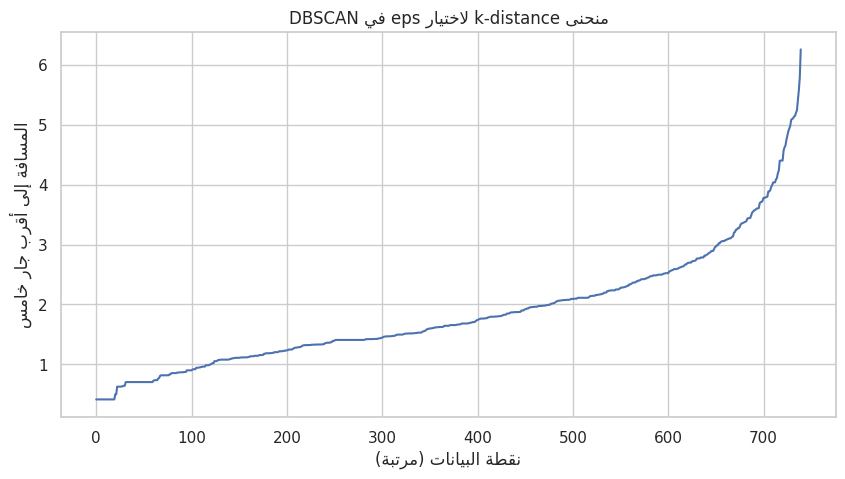

In [17]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# نستخدم 5 جيران لأن min_samples = 5 هو الإعداد الشائع في DBSCAN
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_features)

# نحصل على المسافات إلى الجار الخامس
distances, indices = neighbors_fit.kneighbors(X_features)

# نأخذ فقط المسافة إلى الجار الخامس (العمود رقم 4)
distances = np.sort(distances[:, 4])

# رسم منحنى k-distance
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title(fix_arabic_text("منحنى k-distance لاختيار eps في DBSCAN"))
plt.xlabel(fix_arabic_text("نقطة البيانات (مرتبة)"))
plt.ylabel(fix_arabic_text("المسافة إلى أقرب جار خامس"))
plt.grid(True)
plt.show()


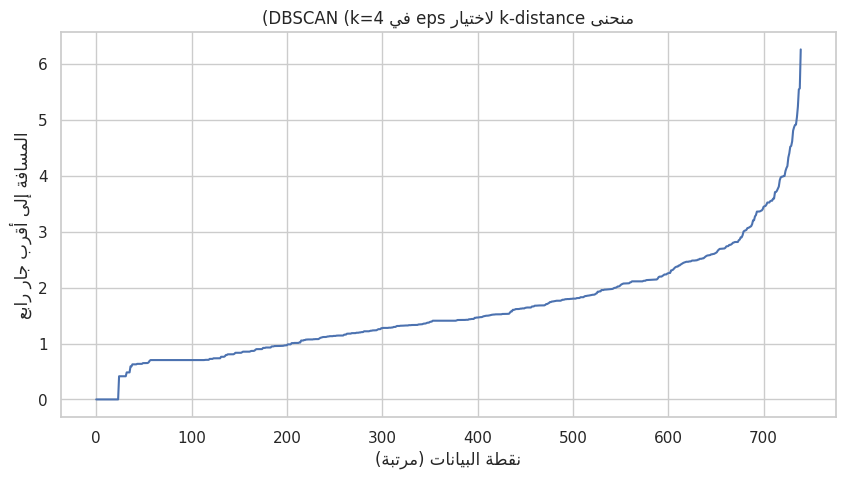

In [18]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# نستخدم 4 جيران لأن min_samples = 4
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_features)

# نحصل على المسافات إلى الجار الرابع
distances, indices = neighbors_fit.kneighbors(X_features)

# نأخذ فقط المسافة إلى الجار الرابع (العمود رقم 3)
distances = np.sort(distances[:, 3])

# رسم منحنى k-distance
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title(fix_arabic_text("منحنى k-distance لاختيار eps في DBSCAN (k=4)"))
plt.xlabel(fix_arabic_text("نقطة البيانات (مرتبة)"))
plt.ylabel(fix_arabic_text("المسافة إلى أقرب جار رابع"))
plt.grid(True)
plt.show()


In [19]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# تطبيق DBSCAN مع القيم المختارة
dbscan_model = DBSCAN(eps=2.4, min_samples=4)
dbscan_labels = dbscan_model.fit_predict(X_features)

# إضافة النتائج إلى إطار البيانات
df_scaled["DBSCAN_Cluster"] = dbscan_labels

# حساب عدد العناقيد (باستثناء الضوضاء)
unique_labels = set(dbscan_labels)
n_clusters_dbscan = len(unique_labels) - (-1 in unique_labels)

# عدد نقاط الضوضاء (Noise)
n_noise = list(dbscan_labels).count(-1)

# حساب Silhouette Score للنقاط المصنفة فقط
mask = dbscan_labels != -1
if np.sum(mask) > 1:
    dbscan_silhouette = silhouette_score(X_features[mask], dbscan_labels[mask])
else:
    dbscan_silhouette = "غير كافٍ للحساب"

# طباعة النتائج
print(f"عدد العناقيد (DBSCAN): {n_clusters_dbscan}")
print(f"عدد نقاط الضوضاء: {n_noise}")
print(f"Silhouette Score (DBSCAN): {dbscan_silhouette}")


عدد العناقيد (DBSCAN): 23
عدد نقاط الضوضاء: 96
Silhouette Score (DBSCAN): 0.31553668709952243


In [20]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# إعداد القيم
eps_val = 4
min_samples_val = 8

# تطبيق DBSCAN
db = DBSCAN(eps=eps_val, min_samples=min_samples_val)
labels = db.fit_predict(X_features)

# عدد العناقيد (باستثناء الضوضاء)
unique_clusters = set(labels)
n_clusters = len(unique_clusters) - (-1 in unique_clusters)

# عدد نقاط الضوضاء
n_noise = list(labels).count(-1)

# حساب Silhouette Score للنقاط المصنفة فقط
mask = labels != -1
if sum(mask) > 1:
    score = silhouette_score(X_features[mask], labels[mask])
else:
    score = -1

# إضافة النتيجة إلى DataFrame
df_scaled["DBSCAN_Cluster_Optimal"] = labels

# عرض النتائج
print(f"عدد العناقيد: {n_clusters}")
print(f"عدد نقاط الضوضاء: {n_noise}")
print(f"Silhouette Score: {score:.3f}")


عدد العناقيد: 4
عدد نقاط الضوضاء: 43
Silhouette Score: 0.187


In [21]:
# استبعاد نقاط الضوضاء التي تحمل التصنيف -1
df_dbscan_clean = df_scaled[df_scaled["DBSCAN_Cluster_Optimal"] != -1]

# حساب المتوسطات الموحدة لكل متغير رقمي داخل كل عنقود
dbscan_feature_means = df_dbscan_clean.groupby("DBSCAN_Cluster_Optimal").mean(numeric_only=True).T

# عرض النتائج
print("المتغيرات المميزة لكل عنقود - DBSCAN (بعد استبعاد الضوضاء):")
print(dbscan_feature_means)


المتغيرات المميزة لكل عنقود - DBSCAN (بعد استبعاد الضوضاء):
DBSCAN_Cluster_Optimal                  0         1          2         3
Month of absence                 0.002148 -0.357473  -0.305321  0.604455
Day of the week                  0.013920  0.241568  -0.425504  0.088079
Seasons                         -0.007782 -0.199818  -0.086689  0.769887
Transportation expense           0.008821 -0.206942  -0.991372  0.090129
Distance from Residence to Work  0.071168 -0.649574  -1.189139 -0.247598
Service time                    -0.042540  0.882104   0.329981  0.293467
Age                             -0.051081  0.662909  -0.378414  0.628630
Work load Average/day           -0.048501  0.093210   0.713885 -0.325709
Hit target                       0.010056  0.331202   0.291736 -0.727565
Disciplinary failure            -0.239046 -0.239046  -0.239046  4.183300
Education                        0.013023  0.525087  -0.433857 -0.433857
Son                             -0.097613  0.893723   0.893723  

In [22]:
# الخطوة 1: استبعاد العمود التفسيري من البيانات الأصلية
original_features = df_clean.drop(columns=["Absenteeism time in hours"])

# الخطوة 2: إنشاء قائمة لتخزين المتوسطات الأصلية لكل عنقود من DBSCAN المحسَّن
dbscan_means_by_cluster = []

# الخطوة 3: حساب متوسط كل متغير داخل كل عنقود (باستثناء نقاط الضوضاء)
for cluster_id in sorted(df_scaled["DBSCAN_Cluster_Optimal"].unique()):
    if cluster_id == -1:
        continue  # تجاوز نقاط الضوضاء
    indices = df_scaled[df_scaled["DBSCAN_Cluster_Optimal"] == cluster_id].index
    cluster_original_mean = original_features.loc[indices].mean()
    dbscan_means_by_cluster.append(cluster_original_mean)

# الخطوة 4: تحويل النتائج إلى DataFrame منظّم
dbscan_cluster_profiles = pd.DataFrame(dbscan_means_by_cluster)
dbscan_cluster_profiles.index.name = "DBSCAN_Cluster_Optimal"

# الخطوة 5: عرض الإطار الناتج
print("السمات المميزة لكل عنقود (DBSCAN المحسَّن):\n")
print(dbscan_cluster_profiles)


السمات المميزة لكل عنقود (DBSCAN المحسَّن):

                        Month of absence  Day of the week   Seasons  \
DBSCAN_Cluster_Optimal                                                
0                               6.331699         3.934641  2.535948   
1                               5.096774         4.258065  2.322581   
2                               5.275862         3.310345  2.448276   
3                               8.400000         4.040000  3.400000   

                        Transportation expense  \
DBSCAN_Cluster_Optimal                           
0                                   221.919935   
1                                   207.483871   
2                                   155.000000   
3                                   227.360000   

                        Distance from Residence to Work  Service time  \
DBSCAN_Cluster_Optimal                                                  
0                                             30.686275     12.367647   
1       